In [1]:
#!pip install pycaret

## Import Libraries

In [1]:
import pandas as pd
from pycaret.classification import *

## Import Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


## Setup PyCaret with Target Variable

In [4]:
exp_clf = setup(train, target = 'Stay')

Setup Succesfully Completed!


,Description,Value
0,session_id,6283
1,Target Type,Multiclass
2,Label Encoded,"0-10: 0, 11-20: 1, 21-30: 2, 31-40: 3, 41-50: 4, 51-60: 5, 61-70: 6, 71-80: 7, 81-90: 8, 91-100: 9, More than 100 Days: 10"
3,Original Data,"(318438, 18)"
4,Missing Values,True
5,Numeric Features,6
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
#best = compare_models(n_select = 3)

In [ ]:
blender_top3 = blend_models(best)

In [ ]:
xgb = create_model('xgboost')

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:48:35
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 2 of 10
ETC,. . . . . . . . . . . . . . . . . .,18.83 Minutes Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4123,0,0.2212,0.3752,0.36,0.2434,0.2535


In [ ]:
tuned_xgb = tuned_dt = tune_model(xgb)

IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:13:51
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


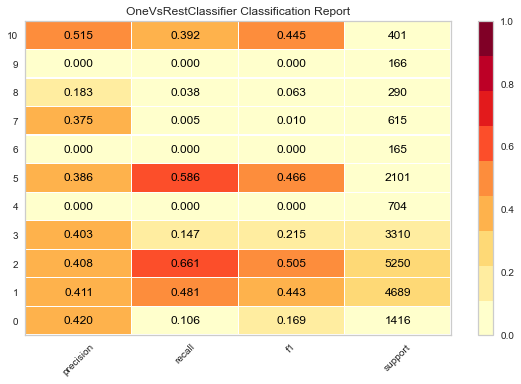

In [19]:
# AUC plot
plot_model(xgb, plot = 'class_report')

In [20]:
test_pred = predict_model(xgb, data = test)

In [21]:
test_pred.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Label,Score
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0,0,0.3539
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0,5,0.4409
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0,2,0.3118
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0,2,0.5001
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0,5,0.4052


In [22]:
test_pred['Stay'] = test_pred['Label']

In [23]:
test_pred[['case_id','Stay']].to_csv('PyCaret_xgb_Output.csv', index = False)

In [24]:
save_model(xgb, 'xgb_Basic', verbose=True)

Transformation Pipeline and Model Succesfully Saved
